In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from pandas import json_normalize

In [21]:
# 출력 옵션 변경
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시

df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")
df.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_10132\1848991504.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")


,fullVisitorId,visitStartTime,channelGrouping,continent,subContinent,country,city,visits,pageviews,hits,newVisits,bounces,transactionRevenue,campaign,source,medium,keyword,browser,operatingSystem,deviceCategory,utc_time
0,1131660440785968503,1472830385,Organic Search,Asia,Western Asia,Turkey,Izmir,1,1,1,1,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-02 15:33:05+00:00
1,377306020877927890,1472880147,Organic Search,Oceania,Australasia,Australia,not available in demo dataset,1,1,1,1,1,0,(not set),google,organic,(not provided),Firefox,Macintosh,desktop,2016-09-03 05:22:27+00:00
2,3895546263509774583,1472865386,Organic Search,Europe,Southern Europe,Spain,Madrid,1,1,1,1,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-03 01:16:26+00:00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fullVisitorId       903653 non-null  object
 1   visitStartTime      903653 non-null  int64 
 2   channelGrouping     903653 non-null  object
 3   continent           903653 non-null  object
 4   subContinent        903653 non-null  object
 5   country             903653 non-null  object
 6   city                903653 non-null  object
 7   visits              903653 non-null  int64 
 8   pageviews           903653 non-null  int64 
 9   hits                903653 non-null  int64 
 10  newVisits           903653 non-null  int64 
 11  bounces             903653 non-null  int64 
 12  transactionRevenue  903653 non-null  int64 
 13  campaign            903653 non-null  object
 14  source              903653 non-null  object
 15  medium              903653 non-null  object
 16  ke

- revenue 와 다른 모든 변수간의 상관관계 확인

In [27]:
group_by_users_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/totals_group_by_userid.csv")
group_by_users_df

C:\Users\user\AppData\Local\Temp\ipykernel_10132\1243073740.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  group_by_users_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/totals_group_by_userid.csv")


,fullVisitorId,country,user_visits,user_pageviews,user_hits,user_newvisits,user_bounces,user_revenues
0,168159078983594,Taiwan,1,56,76,1,0,0
1,174067426171406,Canada,1,25,28,1,0,0
2,197671390269035,United States,1,1,1,1,1,0
3,245437374675368,United States,1,2,2,1,0,0
4,26722803385797,United Kingdom,1,2,3,1,0,0
...,...,...,...,...,...,...,...,...
716919,9999963186378918199,United Kingdom,1,1,1,1,1,0
716920,999997225970956660,United States,1,1,1,1,1,0
716921,999997550040396460,United States,2,3,3,1,1,0
716922,9999978264901065827,United States,1,1,1,1,1,0


In [28]:
group_by_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716924 entries, 0 to 716923
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fullVisitorId   716924 non-null  object
 1   country         716924 non-null  object
 2   user_visits     716924 non-null  int64 
 3   user_pageviews  716924 non-null  int64 
 4   user_hits       716924 non-null  int64 
 5   user_newvisits  716924 non-null  int64 
 6   user_bounces    716924 non-null  int64 
 7   user_revenues   716924 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 43.8+ MB


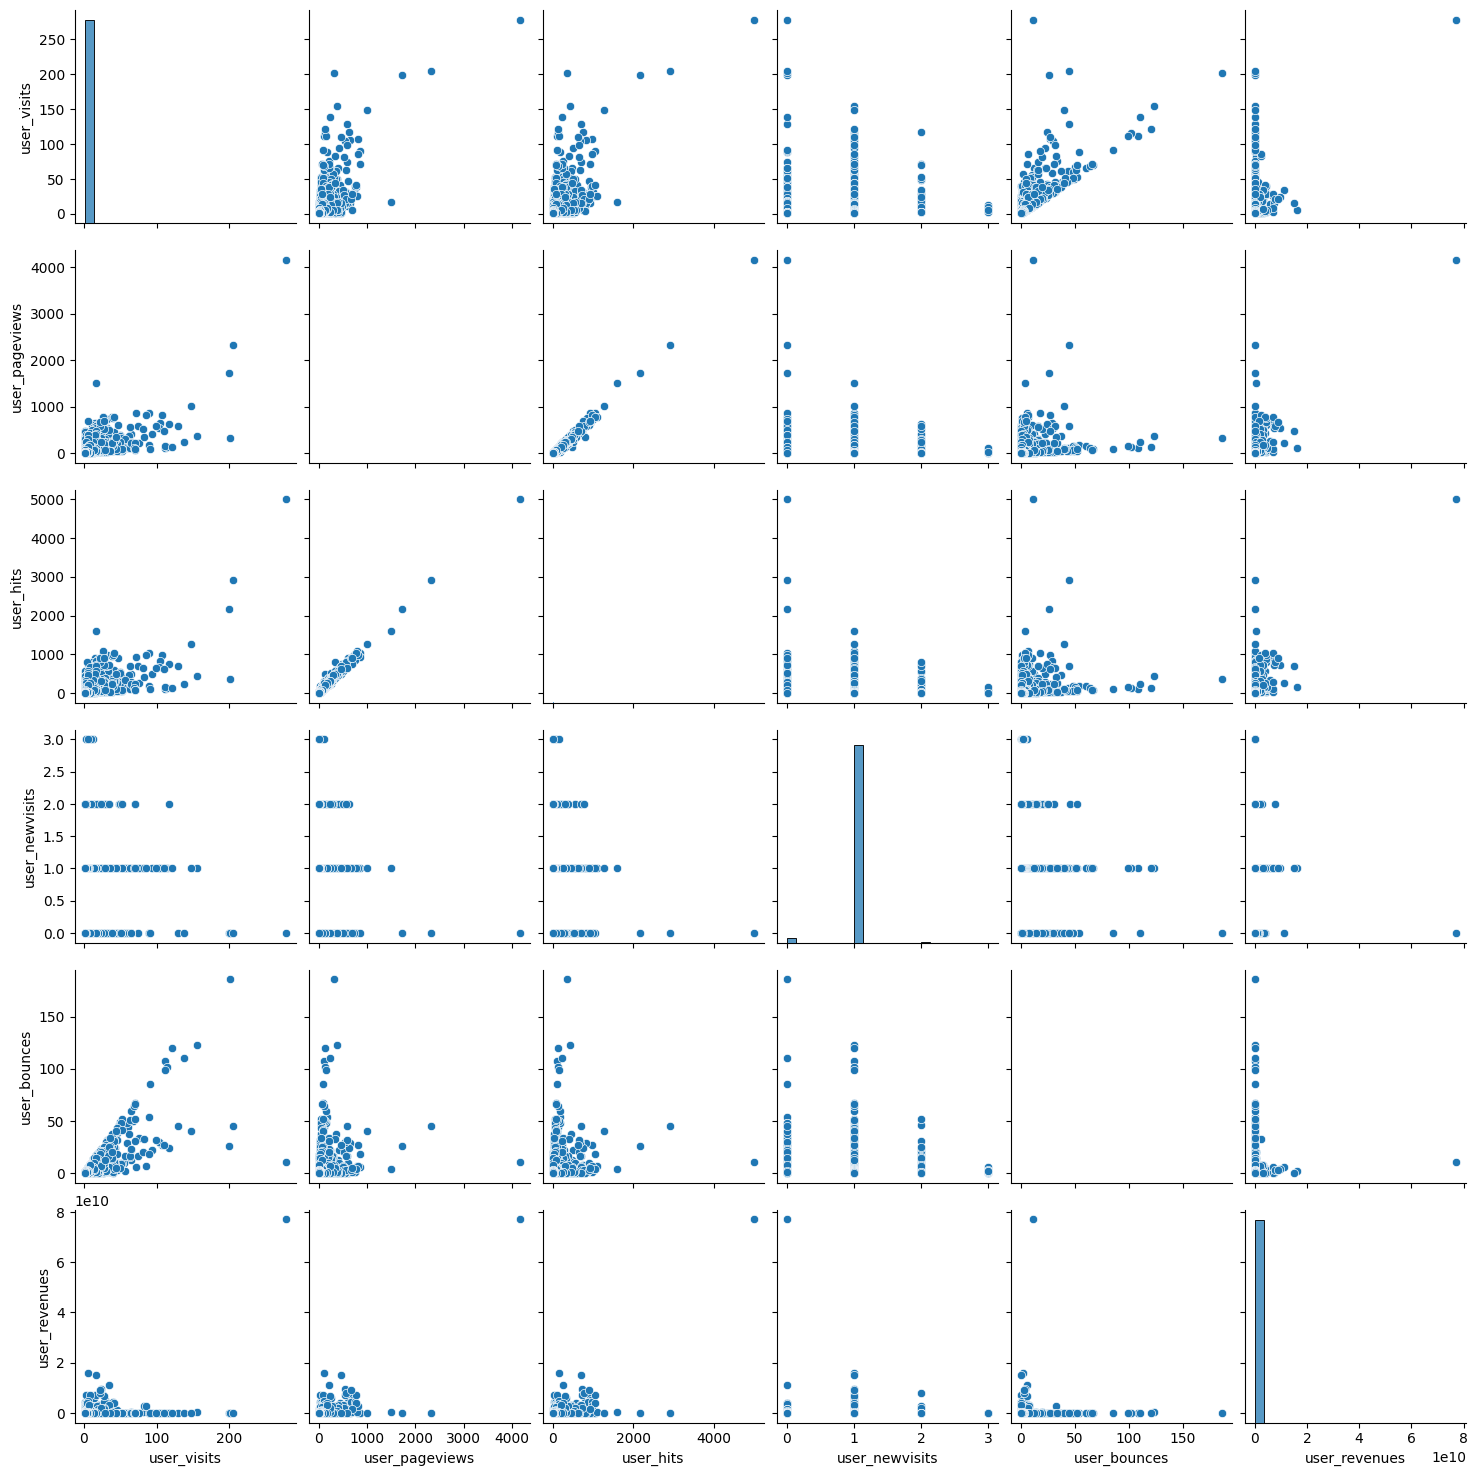

In [36]:
sns.pairplot(group_by_users_df)

- pairplot 으로 봤을 때, 제대로된 상관 관계를 확인하기 어려움

- 이상치를 제거해줄 필요가 있음

In [ ]:
# 이상치 제거 코드

-  이상치를 제거한 데이터를 user_id 기준으로 그룹화한 데이터 테이블 <br>
   (id 기준으로 그룹화한 후 로그 데이터는 총합한 값을 넣음)

- 편집한 데이터 테이블을 기준으로 한 유저로부터 95퍼센트 이상의 확률로 수익이 발생하려면<br>
   그 유저는 몇 번 이상의 페이지 조회수를 가져야하는가에 대해 알아본 것 

In [49]:
import pandas as pd

# 주어진 데이터 프레임
features = ['user_visits', 'user_pageviews', 'user_bounces', 'user_hits']
target = 'user_revenues'

# X와 y 선택
X = group_by_users_df[features]
y = group_by_users_df[target]

# user_pageviews가 0을 초과하면서 user_revenues가 0보다 큰 데이터 선택
filtered_data = group_by_users_df[(group_by_users_df['user_pageviews'] > 0) & (group_by_users_df['user_revenues'] > 0)]

# 95% 이상의 분위수 계산
quantile_threshold = 0.95
quantile_data = filtered_data['user_pageviews'].quantile(quantile_threshold)

print(f"한 유저가 최소 {quantile_data:.0f}번 이상 페이지를 방문해야지만 해당 유저로부터 수익이 발생할 확률이 95% 이상입니다.")


한 유저가 최소 135번 이상 페이지를 방문해야지만 해당 유저로부터 수익이 발생할 확률이 95% 이상입니다.


In [56]:
import pandas as pd

# 주어진 데이터 프레임
features = ['user_visits', 'user_pageviews', 'user_bounces', 'user_hits']
target = 'user_revenues'

# X와 y 선택
X = group_by_users_df[features]
y = group_by_users_df[target]

# user_revenues가 0을 초과하면서 user_pageviews가 0보다 큰 데이터 선택
filtered_data = group_by_users_df[(group_by_users_df['user_revenues'] > 0) & (group_by_users_df['user_pageviews'] > 0)]

# 페이지 방문 횟수를 기준으로 그룹화하여 수익이 발생할 확률 계산
grouped_data = filtered_data.groupby('user_pageviews').size().reset_index(name='total_users')
grouped_data['revenue_probability'] = grouped_data['total_users'].cumsum() / len(filtered_data) * 100

# 결과를 데이터프레임으로 변환
result_df = grouped_data[['user_pageviews', 'revenue_probability']]

print(result_df)


     user_pageviews  revenue_probability
0                 5             0.009970
1                 6             0.029910
2                 7             0.079761
3                 8             0.269192
4                 9             0.558325
..              ...                  ...
337             815            99.960120
338             823            99.970090
339            1006            99.980060
340            1496            99.990030
341            4160           100.000000

[342 rows x 2 columns]


In [60]:
import pandas as pd

# 주어진 데이터 프레임
features = ['user_visits', 'user_pageviews', 'user_bounces', 'user_hits']
target = 'user_revenues'

# X와 y 선택
X = group_by_users_df[features]
y = group_by_users_df[target]

# user_revenues가 0을 초과하면서 user_pageviews가 0보다 큰 데이터 선택
filtered_data = group_by_users_df[(group_by_users_df['user_revenues'] > 0) & (group_by_users_df['user_pageviews'] > 0)]

# 페이지 방문 횟수를 기준으로 그룹화하여 수익이 발생할 확률 계산
grouped_data = filtered_data.groupby('user_pageviews').size().reset_index(name='total_users')
grouped_data['revenue_probability'] = grouped_data['total_users'].cumsum() / len(filtered_data) * 100

# 일정한 간격으로 데이터를 샘플링하여 요약
interval = len(grouped_data) // 50
summary_df = grouped_data.iloc[::interval, :].reset_index(drop=True)
print(summary_df)


    user_pageviews  total_users  revenue_probability
0                5            1             0.009970
1               11          107             2.123629
2               17          210            12.143569
3               23          216            25.274177
4               29          199            37.906281
5               35          171            48.394816
6               41          120            57.208375
7               47          104            64.586241
8               53           90            70.707876
9               59           63            75.134596
10              65           50            78.893320
11              71           47            81.974078
12              77           38            84.386839
13              83           31            86.500499
14              89           25            88.035892
15              95           29            89.680957
16             101           16            90.987039
17             107           16            92.

- 1년이라는 기간동안 대략 새로운 페이지의 조회수가 130번 이상이 되어야지 수익이 발생할 확률이 95% 이상

- 일주일로 단순 환산한다면 일주일에 2.49번 이상 새로운 페이지를 조회했을때 수익이 발생할 확률이 높을 것이라고 어림잡아 예상할 수 있다.

- 이 정보를 기반으로 다시 아하 모먼트를 찾아볼 것임 <br>- 실질적으로 일주일 안에 몇번 이상의 pageview 가 있어야지 95% 의 확률로 revenue 가 생성되는지

- 일주일 안에 n번 이상 웹사이트를 방문한 적이 한번이라도 있는 유저 - 그 유저 집단에서 수익이 발생할 확률

이걸 표로 만들어보면 되지않을까?

1번 이상인 유저집단 - 이 집단에서 수익이 발생할 확률<br>
2번 이상인 유저집단 - 이 집단에서 수익이 발생할 확률<br>
3번 이상인 유저집단 - 이 집단에서 수익이 발생할 확률<br>
4번 이상인 유저집단 - 이 집단에서 수익이 발생할 확률<br>
5번 이상인 유저집단 - 이 집단에서 수익이 발생할 확률<br>

이런 표로 만들면 될꺼같은데